# Badminton or Tennis

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [3]:
bs = 25

## Looking at the data

We are going to use the images downloaded from internet. It has two folders named 'tennis' & 'badminton' under folder named 'game', each having 50 images of Tennis & Badminton game in action. Our model will need to learn to differentiate between these 2 distinct categories. Let's see how accurate we can be using deep learning!

In [4]:
path = os.path.join('/home/paperspace/fastai/data/game')

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

In [5]:
data = (ImageItemList.from_folder(path).random_split_by_pct().label_from_folder().transform(tfms = get_transforms(), size=200).databunch()).normalize(imagenet_stats)

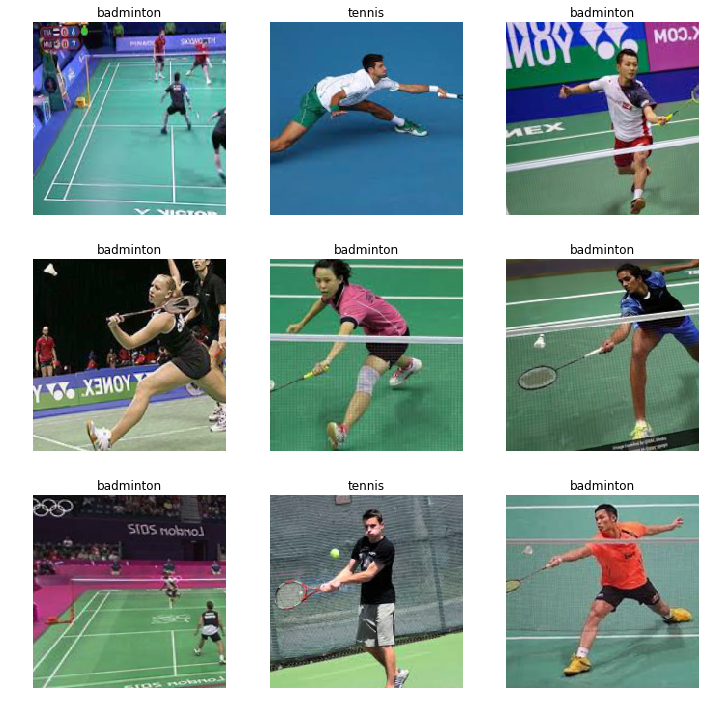

In [6]:
data.show_batch(rows=3, figsize=(10,10))

In [7]:
print(data.classes)
len(data.classes),data.c

['badminton', 'tennis']


(2, 2)

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. 

In [8]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


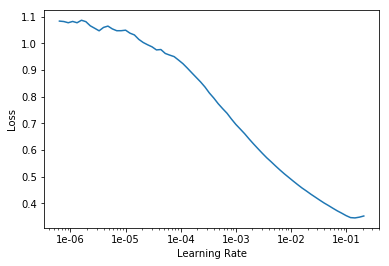

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate
1,0.761166,0.783255,0.700000
2,0.740629,0.538937,0.250000


In [11]:
learn.save('stage-1-50')

In [12]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-3,1e-1))

epoch,train_loss,valid_loss,error_rate
1,0.353499,4.090537,0.400000


If it doesn't, you can always go back to your previous model.

In [13]:
learn.load('stage-1-50');

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

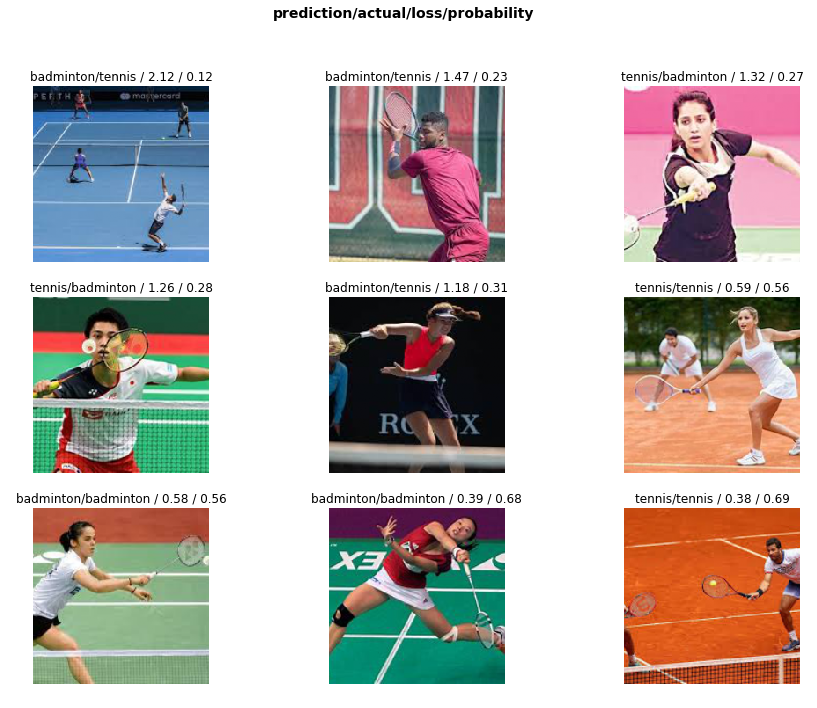

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

In [16]:
interp.most_confused(min_val=2)

[('tennis', 'badminton', 3)]

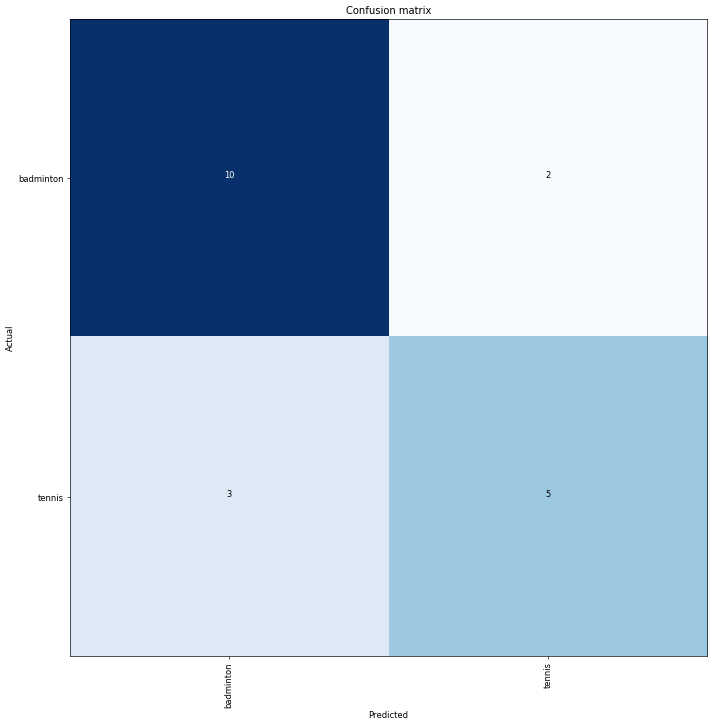

In [17]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)